In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import sys
sys.path.append('../../src')
from DataLoader import DataLoader

In [19]:
fileLoader = DataLoader("../config.yaml")

## Einlesen der Datensätze

In [20]:
# Lade alle Ähnlichkeitsmatrizen aus der Konfigurationsdatei
print("Lade Ähnlichkeitsmatrizen...")

df_ai_similarity = fileLoader.load_data("files.df_ai_similarity")
df_keyword_cos_similarity = fileLoader.load_data("files.df_keyword_cos_similarity")
df_keyword_jaccard_similarity = fileLoader.load_data("files.df_keyword_jaccard_similarity")
df_keyword_weighted_jaccard_similarity = fileLoader.load_data("files.df_keyword_weighted_jaccard_similarity")
df_keyword_tfidf_cosine_similarity = fileLoader.load_data("files.df_keyword_tfidf_cosine_similarity")
df_keyword_overlap_similarity = fileLoader.load_data("files.df_keyword_overlap_similarity")
df_keyword_dice_similarity = fileLoader.load_data("files.df_keyword_dice_similarity")
df_keyword_hierarchical_similarity = fileLoader.load_data("files.df_keyword_hierarchical_similarity")
df_minhash_text_similarity = fileLoader.load_data("files.df_minhash_text_similarity")

Lade Ähnlichkeitsmatrizen...
/media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/OPAL_ai_similaritiy.p
/media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/cosine_keywords_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/jaccard_keyword_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/weighted_jaccard_keyword_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/tfidf_cosine_keyword_similarity_optimized.p
/media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/overlap_coefficient_keyword_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/dice_coefficient_keyword_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/weighted_jaccard_keyword_similarity.p
/media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/tfidf_cosine_keyword_similarity_optimized.p
/media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/overlap_coefficient_keyword_similarity.p
/media/sz/Data/Co

In [21]:
# Automatische Bereinigung aller Ähnlichkeitsmatrizen
print("Bereinige alle Ähnlichkeitsmatrizen...")

# Liste aller geladenen Ähnlichkeitsmatrizen
similarity_matrices = {
    'AI': df_ai_similarity,
    'Cosine': df_keyword_cos_similarity,
    'Jaccard': df_keyword_jaccard_similarity,
    'Weighted Jaccard': df_keyword_weighted_jaccard_similarity,
    'TF-IDF Cosine': df_keyword_tfidf_cosine_similarity,
    'Overlap': df_keyword_overlap_similarity,
    'Dice': df_keyword_dice_similarity,
    'Hierarchical': df_keyword_hierarchical_similarity,
    'MinHash Text': df_minhash_text_similarity
}

# Bearbeite alle Matrizen automatisch
for name, matrix in similarity_matrices.items():
    print(f"  Bearbeite {name} Matrix...")
    
    # Entferne Index-Level-Namen (falls vorhanden)
    if hasattr(matrix.index, 'nlevels') and matrix.index.nlevels > 1:
        matrix.index.names = [None] * matrix.index.nlevels
    if hasattr(matrix.columns, 'nlevels') and matrix.columns.nlevels > 1:
        matrix.columns.names = [None] * matrix.columns.nlevels
    
    # Setze Diagonale auf NaN
    np.fill_diagonal(matrix.values, np.nan)
    
    print(f"    ✓ Shape: {matrix.shape}")

print("✅ Alle Ähnlichkeitsmatrizen bereinigt!")
print(f"Verfügbare Matrizen: {list(similarity_matrices.keys())}")

Bereinige alle Ähnlichkeitsmatrizen...
  Bearbeite AI Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Cosine Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Jaccard Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Weighted Jaccard Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite TF-IDF Cosine Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Overlap Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Dice Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite Hierarchical Matrix...
    ✓ Shape: (4548, 4548)
  Bearbeite MinHash Text Matrix...
    ✓ Shape: (4548, 4548)
✅ Alle Ähnlichkeitsmatrizen bereinigt!
Verfügbare Matrizen: ['AI', 'Cosine', 'Jaccard', 'Weighted Jaccard', 'TF-IDF Cosine', 'Overlap', 'Dice', 'Hierarchical', 'MinHash Text']


In [22]:
# Automatische Erstellung der oberen Dreiecksmatrizen für alle Ähnlichkeitsmatrizen
print("Erstelle obere Dreiecksmatrizen...")

def upper_triangle_matrix(df):
    """Erzeugt obere Dreiecksmatrix mit NaN für untere Dreiecks- und Diagonalelemente"""
    mask = np.triu(np.ones(df.shape), k=1).astype(bool)
    upper_triangle_df = df.where(mask)
    return upper_triangle_df

# Erstelle automatisch obere Dreiecksmatrizen für alle Ähnlichkeitsmatrizen
upper_triangle_matrices = {}
for name, matrix in similarity_matrices.items():
    var_name = name.lower().replace(' ', '_').replace('-', '_')
    upper_matrix = upper_triangle_matrix(matrix)
    upper_triangle_matrices[var_name] = upper_matrix
    
    # Erstelle Variablen mit standardisierten Namen
    globals()[f'df_{var_name}_similarity_upper'] = upper_matrix
    
    print(f"  ✓ {name} → df_{var_name}_similarity_upper")

print("✅ Alle oberen Dreiecksmatrizen erstellt!")
print(f"Verfügbare obere Dreiecksmatrizen:")
for key in upper_triangle_matrices.keys():
    print(f"  - df_{key}_similarity_upper")

# Zeige Beispiel der ersten Matrix
first_key = list(upper_triangle_matrices.keys())[0]
first_matrix = upper_triangle_matrices[first_key]
print(f"\nBeispiel (erste Matrix - {first_key}):")
print(f"Shape: {first_matrix.shape}")
print(f"Non-NaN Werte: {first_matrix.count().sum()}")

Erstelle obere Dreiecksmatrizen...
  ✓ AI → df_ai_similarity_upper
  ✓ Cosine → df_cosine_similarity_upper
  ✓ AI → df_ai_similarity_upper
  ✓ Cosine → df_cosine_similarity_upper
  ✓ Jaccard → df_jaccard_similarity_upper
  ✓ Weighted Jaccard → df_weighted_jaccard_similarity_upper
  ✓ Jaccard → df_jaccard_similarity_upper
  ✓ Weighted Jaccard → df_weighted_jaccard_similarity_upper
  ✓ TF-IDF Cosine → df_tf_idf_cosine_similarity_upper
  ✓ TF-IDF Cosine → df_tf_idf_cosine_similarity_upper
  ✓ Overlap → df_overlap_similarity_upper
  ✓ Overlap → df_overlap_similarity_upper
  ✓ Dice → df_dice_similarity_upper
  ✓ Dice → df_dice_similarity_upper
  ✓ Hierarchical → df_hierarchical_similarity_upper
  ✓ MinHash Text → df_minhash_text_similarity_upper
✅ Alle oberen Dreiecksmatrizen erstellt!
Verfügbare obere Dreiecksmatrizen:
  - df_ai_similarity_upper
  - df_cosine_similarity_upper
  - df_jaccard_similarity_upper
  - df_weighted_jaccard_similarity_upper
  - df_tf_idf_cosine_similarity_upper
  - 

In [23]:
# Welche column Namen sind in allen 7 Dataframes enthalten?

all_ids = set ()
for matrix in similarity_matrices.values():
    all_ids.update(matrix.columns.tolist())

len(all_ids)

4548

Erstelle Histogramme für alle Ähnlichkeitsmatrizen...


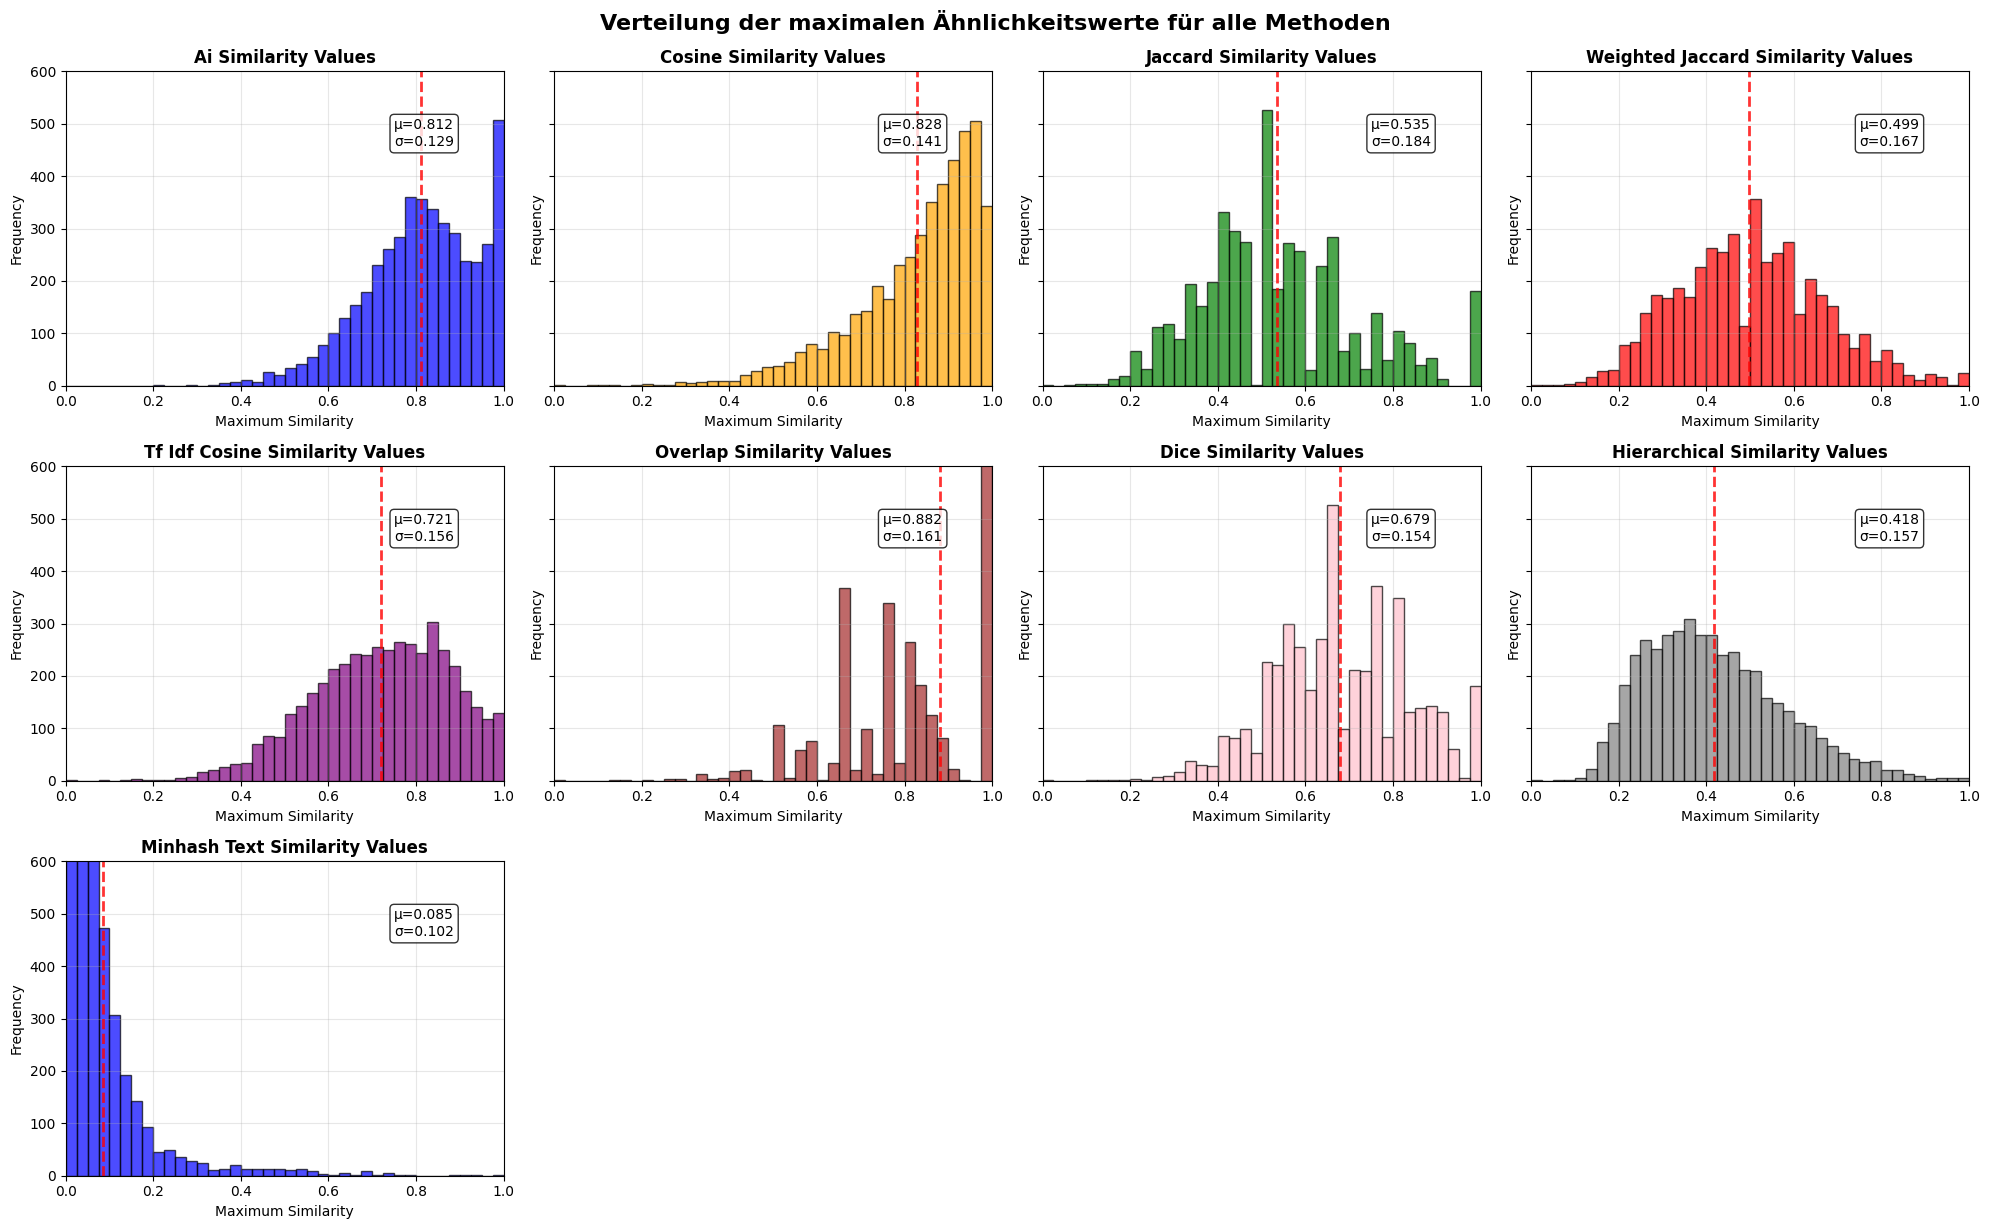

✅ Histogramme für 9 Ähnlichkeitsmatrizen erstellt und gespeichert!
Datei: all_similarity_histograms_comparison.png


In [24]:
# Automatische Histogramm-Visualisierung für alle Ähnlichkeitsmatrizen
print("Erstelle Histogramme für alle Ähnlichkeitsmatrizen...")

# Anzahl der Matrizen bestimmen
n_matrices = len(upper_triangle_matrices)

# Berechne optimale Subplot-Anordnung
import math
n_cols = min(4, n_matrices)  # Maximal 4 Spalten
n_rows = math.ceil(n_matrices / n_cols)

# Erstelle Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), sharey=True)

# Stelle sicher, dass axes ein Array ist, auch bei nur einem Subplot
if n_matrices == 1:
    axes = [axes]
elif n_rows == 1:
    axes = axes
else:
    axes = axes.flatten()

# Farben für verschiedene Ähnlichkeitsmatrizen
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Erstelle Histogramm für jede Matrix
for i, (name, matrix) in enumerate(upper_triangle_matrices.items()):
    if i < len(axes):
        # Berechne Maximum pro Zeile (Material)
        max_similarities = matrix.max(axis=1)
        
        # Erstelle Histogramm
        max_similarities.hist(
            bins=np.arange(0, 1.01, 0.025), 
            edgecolor='black', 
            ax=axes[i], 
            color=colors[i % len(colors)], 
            alpha=0.7
        )
        
        # Formatiere Titel und Achsen
        axes[i].set_title(f'{name.replace("_", " ").title()} Similarity Values', fontweight='bold')
        axes[i].set_xlabel('Maximum Similarity')
        axes[i].set_ylabel('Frequency')
        axes[i].set_xlim(0, 1)
        axes[i].set_ylim(0, 600)
        axes[i].grid(True, alpha=0.3)
        
        # Füge Statistiken hinzu
        mean_val = max_similarities.mean()
        std_val = max_similarities.std()
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, linewidth=2)
        
        # Textbox mit Statistiken
        stats_text = f'μ={mean_val:.3f}\nσ={std_val:.3f}'
        axes[i].text(0.75, 0.85, stats_text, transform=axes[i].transAxes, 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                    verticalalignment='top')

# Verstecke überschüssige Subplots
for i in range(n_matrices, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Verteilung der maximalen Ähnlichkeitswerte für alle Methoden', 
             fontsize=16, y=1.02, fontweight='bold')

# Speichere das Diagramm
plt.savefig('all_similarity_histograms_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Histogramme für {n_matrices} Ähnlichkeitsmatrizen erstellt und gespeichert!")
print("Datei: all_similarity_histograms_comparison.png")

In [25]:
# Automatische Erstellung eines kombinierten DataFrames für alle Ähnlichkeitsmatrizen
print("Erstelle kombinierten DataFrame für alle Ähnlichkeitsmatrizen...")
print("(MultiIndex-Probleme wurden bereits in Zelle 6 bereinigt)")

def sorted_pair(file1, file2):
    """Erstellt ein sortiertes Tupel für konsistente Paar-Identifikation"""
    return tuple(sorted([file1, file2]))

# Sammle alle Ähnlichkeitswerte pro Dateipaar
all_similarities = {}

for name, matrix in upper_triangle_matrices.items():
    print(f"  Verarbeite {name}...")
    
    try:
        # Entferne Index- und Spalten-Namen vor dem Stack-Vorgang
        matrix_clean = matrix.copy()
        matrix_clean.index.name = None
        matrix_clean.columns.name = None
        
        # Einfache Konvertierung zu stacked DataFrame mit future_stack=True
        matrix_stacked = matrix_clean.stack(future_stack=True)
        matrix_stacked_df = matrix_stacked.reset_index()
        
        # Jetzt sollten es immer 3 Spalten sein
        if len(matrix_stacked_df.columns) != 3:
            print(f"    ⚠️  Unerwartete Spaltenanzahl: {len(matrix_stacked_df.columns)}")
            print(f"    Spalten: {list(matrix_stacked_df.columns)}")
            continue
        
        # Setze Standardspaltennamen
        matrix_stacked_df.columns = ['file1', 'file2', f'similarity_{name}']
        
        # Entferne NaN-Werte manuell nach dem Stack-Vorgang
        matrix_stacked_df = matrix_stacked_df.dropna(subset=[f'similarity_{name}'])
        
        # Erstelle sortierte Paare für konsistente Zuordnung
        matrix_stacked_df['Pair'] = matrix_stacked_df.apply(lambda row: sorted_pair(row['file1'], row['file2']), axis=1)
        
        # Speichere die Ähnlichkeitswerte
        processed_pairs = 0
        for _, row in matrix_stacked_df.iterrows():
            pair = row['Pair']
            similarity_value = row[f'similarity_{name}']
            
            # Überspringe NaN-Werte (sollten bereits entfernt sein)
            if pd.isna(similarity_value):
                continue
            
            if pair not in all_similarities:
                all_similarities[pair] = {
                    'file1': pair[0],
                    'file2': pair[1],
                    'Pair': pair
                }
            
            all_similarities[pair][f'similarity_{name}'] = similarity_value
            processed_pairs += 1
        
        print(f"    ✅ Verarbeitet: {processed_pairs:,} gültige Paare")
        
    except Exception as e:
        print(f"    ❌ Fehler bei {name}: {str(e)}")
        print(f"    Matrix Info: Index={type(matrix.index)}, Columns={type(matrix.columns)}")
        # Zeige zusätzliche Debug-Info
        print(f"    Index Name: {getattr(matrix.index, 'name', 'None')}")
        print(f"    Columns Name: {getattr(matrix.columns, 'name', 'None')}")
        continue

# Konvertiere zu DataFrame
print("\nKonvertiere zu DataFrame...")
merged_all_similarities = pd.DataFrame(list(all_similarities.values()))

# Zeige Statistiken
print(f"\n✅ Kombinierter DataFrame erstellt!")
print(f"📊 Anzahl Dateipaare: {len(merged_all_similarities):,}")
print(f"📈 Anzahl erfolgreich verarbeiteter Matrizen: {len([col for col in merged_all_similarities.columns if col.startswith('similarity_')])}")
print(f"📋 DataFrame Shape: {merged_all_similarities.shape}")

# Zeige Spaltenübersicht
print(f"\n📋 Verfügbare Ähnlichkeitsmetriken:")
similarity_columns = [col for col in merged_all_similarities.columns if col.startswith('similarity_')]
for col in similarity_columns:
    non_nan_count = merged_all_similarities[col].count()
    print(f"  - {col}: {non_nan_count:,} gültige Werte")

# Zeige erste Zeilen
if len(merged_all_similarities) > 0:
    print(f"\n🔍 Erste 5 Zeilen:")
    display(merged_all_similarities.head())
else:
    print("\n⚠️  Kein DataFrame erstellt - alle Matrizen fehlgeschlagen!")

Erstelle kombinierten DataFrame für alle Ähnlichkeitsmatrizen...
(MultiIndex-Probleme wurden bereits in Zelle 6 bereinigt)
  Verarbeite ai...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite cosine...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite cosine...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite jaccard...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite jaccard...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite weighted_jaccard...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite weighted_jaccard...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite tf_idf_cosine...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite tf_idf_cosine...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite overlap...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite overlap...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite dice...
    ✅ Verarbeitet: 10,339,878 gültige Paare
  Verarbeite dice...
    ✅ Verarbeitet: 1

,file1,file2,Pair,similarity_ai,similarity_cosine,similarity_jaccard,similarity_weighted_jaccard,similarity_tf_idf_cosine,similarity_overlap,similarity_dice,similarity_hierarchical,similarity_minhash_text
0,8I6sM5zapD60,8ZICOHBmAHyQ,"(8I6sM5zapD60, 8ZICOHBmAHyQ)",0.381628,0.031311,0.076923,0.040000,0.021814,0.166667,0.142857,0.171429,0.0
1,8I6sM5zapD60,8Lfz8SAKa6k0,"(8I6sM5zapD60, 8Lfz8SAKa6k0)",0.141063,0.473471,0.142857,0.142857,0.265912,0.250000,0.250000,0.143254,0.0
2,3ztCv-WpxJ4U,8I6sM5zapD60,"(3ztCv-WpxJ4U, 8I6sM5zapD60)",0.266481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.0
3,6mOhjfscZK2A,8I6sM5zapD60,"(6mOhjfscZK2A, 8I6sM5zapD60)",0.476874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148980,0.0
4,1eteONeHL82Y,8I6sM5zapD60,"(1eteONeHL82Y, 8I6sM5zapD60)",0.436708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102041,0.0


In [26]:
# Speichern des kombinierten DataFrames
print("💾 Speichere kombinierten DataFrame...")

processed_data_folder = fileLoader.config_manager.get("folder_structure.processed_data_folder")
output_path = Path(processed_data_folder) / "similarity_all_metrics.p"

# Speichere den neuen kombinierten DataFrame
merged_all_similarities.to_pickle(output_path)

print(f"✅ Kombinierter DataFrame gespeichert als: {output_path}")
print(f"📊 Gespeicherte Daten: {merged_all_similarities.shape[0]:,} Dateipaare × {merged_all_similarities.shape[1]} Spalten")

# Zeige Dateigröße
import os
if output_path.exists():
    file_size_mb = os.path.getsize(output_path) / (1024 * 1024)
    print(f"📁 Dateigröße: {file_size_mb:.1f} MB")

print(f"\n🎉 FERTIG! Alle {len([col for col in merged_all_similarities.columns if col.startswith('similarity_')])} Ähnlichkeitsmetriken erfolgreich kombiniert und gespeichert!")

💾 Speichere kombinierten DataFrame...
✅ Kombinierter DataFrame gespeichert als: /media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/similarity_all_metrics.p
📊 Gespeicherte Daten: 10,339,878 Dateipaare × 12 Spalten
📁 Dateigröße: 921.2 MB

🎉 FERTIG! Alle 9 Ähnlichkeitsmetriken erfolgreich kombiniert und gespeichert!
✅ Kombinierter DataFrame gespeichert als: /media/sz/Data/Connected_Lecturers/Opal_crosslab/processed/similarity_all_metrics.p
📊 Gespeicherte Daten: 10,339,878 Dateipaare × 12 Spalten
📁 Dateigröße: 921.2 MB

🎉 FERTIG! Alle 9 Ähnlichkeitsmetriken erfolgreich kombiniert und gespeichert!
